In [155]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
#import my table
file_path= r'C:\Users\USA\Downloads\HollywoodsMostProfitableStories.csv'
df= pd.read_csv(file_path)

In [159]:
# to see the first rows of my dataset
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [161]:
# to know the number of rows and columns in my dataset
df.shape

(74, 8)

In [163]:
# to see columns names
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [165]:
# to remane the audience score column, which will trim the white space 
df.rename(columns={'Audience  score %': 'Audience score %'}, inplace=True)

In [167]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [169]:
# to see the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience score %   73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


DATA CLEANING

In [172]:
# I want to display the rows with non values
nulls_rows = df[df.isnull().any(axis=1)]
nulls_rows

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.14700,2011
38,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.60105,2007
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.37000,2010
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.18300,2011
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.04000,2010


In [174]:
# to replace the null values for the movie : No Reservations
df.loc[df['Film'] == 'No Reservations', 'Lead Studio'] = 'Warner Bros'

In [176]:
nulls_rows = df[df.isnull().any(axis=1)]
nulls_rows

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.183,2011
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [178]:
# to replace the null values for the movie : Something Borrowed
df.loc[df['Film'] == 'Something Borrowed', 'Audience score %'] = 48.0

In [180]:
nulls_rows = df[df.isnull().any(axis=1)]
nulls_rows

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
50,Something Borrowed,Romance,Independent,48.0,1.719514,NaN,60.183,2011
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [182]:
# to replace the null values for the movie : Something Borrowed
df.loc[df['Film'] == 'Something Borrowed', 'Rotten Tomatoes %'] = 15.0

In [184]:
nulls_rows = df[df.isnull().any(axis=1)]
nulls_rows

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [186]:
# To check for duplicate
df.drop_duplicates()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [188]:
# - Which genres are the most profitable?
genres_profit= df.groupby('Genre')['Profitability'].mean().round(2).sort_values(ascending=False)
genres_profit

Genre
Drama        8.41
Romance      4.37
Comedy       3.94
Animation    3.22
Fantasy      1.78
Action       1.25
Name: Profitability, dtype: float64

In [190]:
# - Which LeadStudio are the most profitable?
LeadStudio_profit= df.groupby('Lead Studio')['Profitability'].mean().round(2).sort_values(ascending=False)
LeadStudio_profit

Lead Studio
Disney                   7.41
Independent              6.58
Summit                   6.38
Sony                     4.84
Fox                      4.51
Universal                4.44
Warner Bros              3.31
Warner Bros.             3.21
Paramount                2.59
20th Century Fox         2.53
CBS                      2.20
New Line                 2.07
Lionsgate                1.81
The Weinstein Company    1.22
Name: Profitability, dtype: float64

In [192]:
# What is the average Rotten Tomatoes score for movies produced by different studios?
Studio_RottenTomatoes= df.groupby('Lead Studio')['Rotten Tomatoes %'].mean().round(2).sort_values(ascending=False)
Studio_RottenTomatoes

Lead Studio
The Weinstein Company    71.67
Disney                   65.29
Universal                59.00
Sony                     52.00
Fox                      51.83
20th Century Fox         49.00
Paramount                46.25
Independent              45.47
Summit                   39.20
Warner Bros              39.00
Warner Bros.             36.42
CBS                      20.00
New Line                 15.00
Lionsgate                 7.00
Name: Rotten Tomatoes %, dtype: float64

In [194]:
# What are the trends in movie profitability over the years?
Yearly_profitability= df.groupby('Year')['Profitability'].mean().round(2)
Yearly_profitability

Year
2007    4.06
2008    8.14
2009    5.02
2010    2.23
2011    3.27
Name: Profitability, dtype: float64

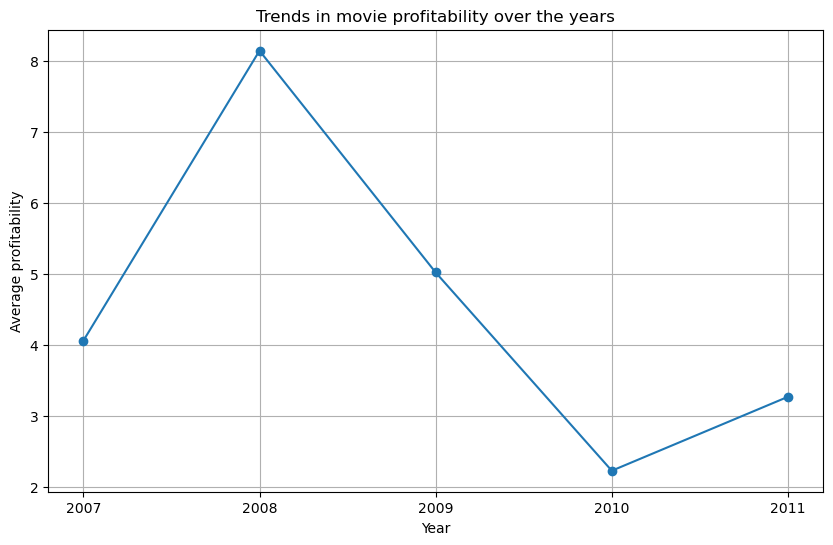

In [196]:
# to plot the trends in movie profitability over the years
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
Yearly_profitability.plot(marker='o')
plt.title('Trends in movie profitability over the years')
plt.xlabel('Year')
plt.ylabel('Average profitability')
plt.grid(True)

# Set x-axis to show integer years
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))


plt.show()

In [197]:
# How have audience and Rotten Tomatoes scores changed over the years?
Yearly_rating= df.groupby('Year')[['Audience score %', 'Rotten Tomatoes %']].mean().round(2)
Yearly_rating

,Audience score %,Rotten Tomatoes %
Year,,
2007,66.73,48.82
2008,69.79,53.79
2009,62.75,44.25
2010,55.68,37.47
2011,66.08,51.54


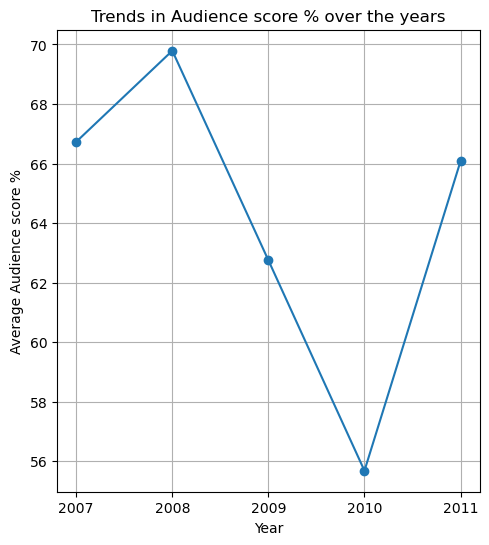

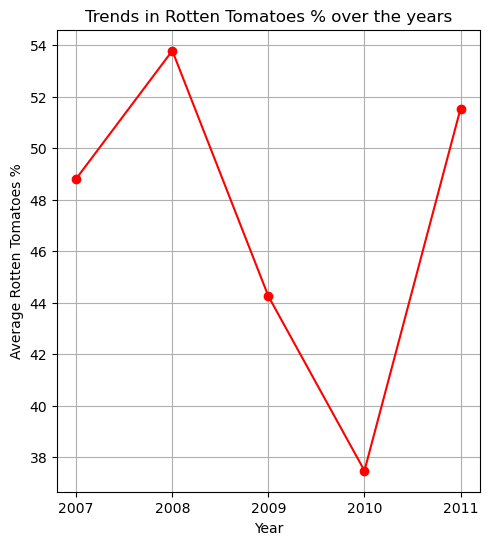

In [200]:
# to plot the trends in Audience score over the years
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Yearly_rating['Audience score %'].plot(marker='o')
plt.title('Trends in Audience score % over the years')
plt.xlabel('Year')
plt.ylabel('Average Audience score %')
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))


# to plot the trends in Rotten Tomatoes % over the years
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
Yearly_rating['Rotten Tomatoes %'].plot(marker='o',color='r')
plt.title('Trends in Rotten Tomatoes % over the years')
plt.xlabel('Year')
plt.ylabel('Average Rotten Tomatoes %')
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))


plt.show()

In [201]:
#  What is the average worldwide gross for movies in different genres?
Average_Genre_WorldwideGross= df.groupby('Genre')['Worldwide Gross'].mean().round(2).sort_values(ascending=False)
Average_Genre_WorldwideGross

Genre
Animation    356.78
Fantasy      285.43
Romance      133.54
Comedy       130.50
Drama         99.01
Action        93.40
Name: Worldwide Gross, dtype: float64

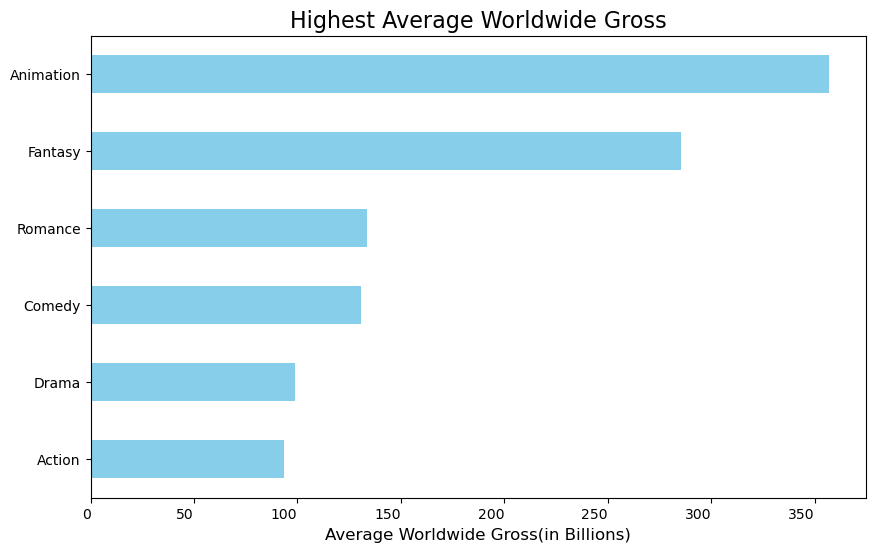

In [202]:
# To plot a column chart or an horizontal bar chart
plt.figure(figsize=(10,6))
Average_Genre_WorldwideGross.plot(kind='barh',color='skyblue')
plt.title('Highest Average Worldwide Gross',fontsize=16)
plt.ylabel('')
plt.xlabel('Average Worldwide Gross(in Billions)',fontsize=12)
plt.xticks(rotation=0,ha='right')
plt.gca().invert_yaxis()
plt.show()

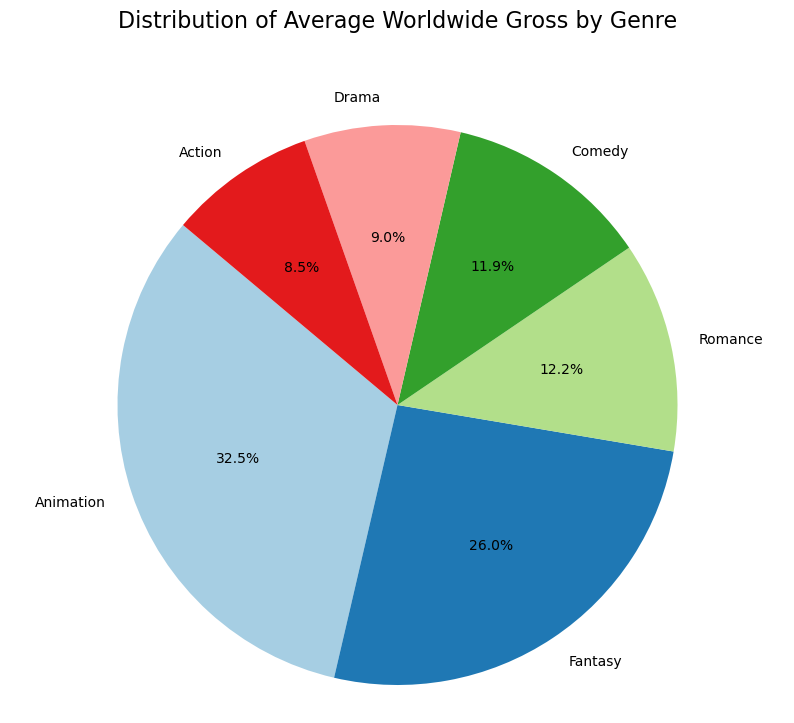

In [203]:
# To creat a pie chart
plt.figure(figsize=(10,8))
colors = plt.cm.Paired(range(len(Average_Genre_WorldwideGross)))
Average_Genre_WorldwideGross.plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=colors)
plt.title('Distribution of Average Worldwide Gross by Genre',fontsize=16,y=1.1)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [207]:
#  Which years had the highest average worldwide gross? And plot it
Yearly_Average_WorldwideGross=df.groupby('Year')['Worldwide Gross'].mean().round(2).sort_index()
Yearly_Average_WorldwideGross

Year
2007    119.52
2008    186.27
2009    167.28
2010     89.89
2011    116.98
Name: Worldwide Gross, dtype: float64

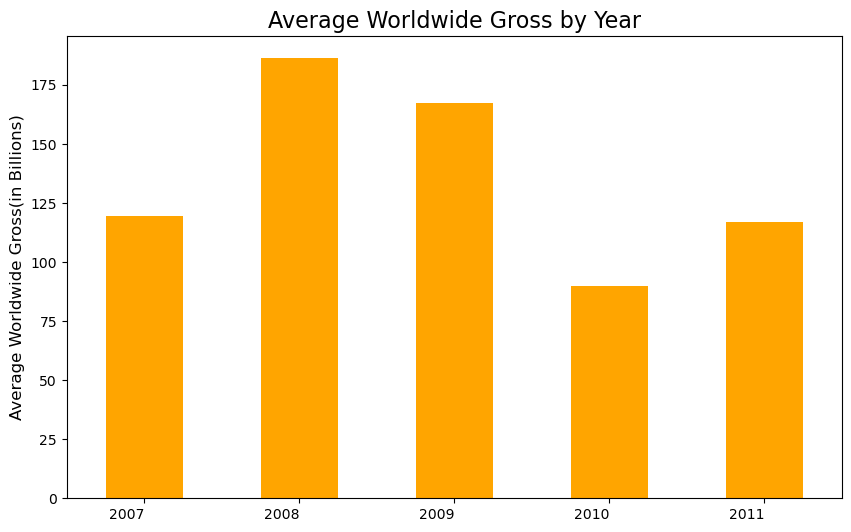

In [208]:
# plot a bar chart to show the distribution of average worldwide gross by year
plt.figure(figsize=(10,6))
Yearly_Average_WorldwideGross.plot(kind='bar',color='orange')
plt.title('Average Worldwide Gross by Year',fontsize=16)
plt.xlabel('')
plt.ylabel('Average Worldwide Gross(in Billions)',fontsize=12)
plt.xticks(rotation=0,ha='right')
plt.show()

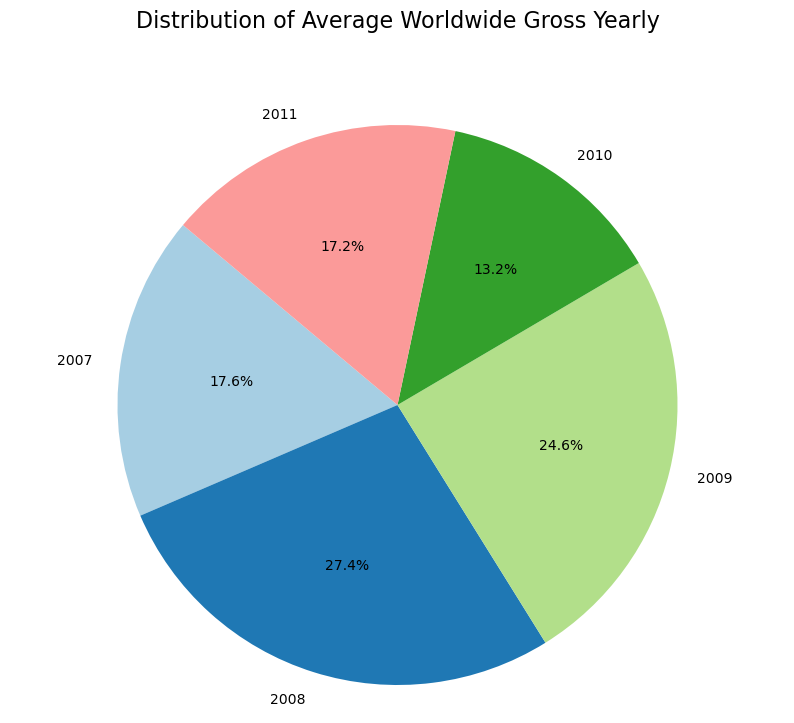

In [210]:
# plot a pie chart to show the distribution of average worldwide gross by year
plt.figure(figsize=(10,8))
colors = plt.cm.Paired(range(len(Yearly_Average_WorldwideGross)))
Yearly_Average_WorldwideGross.plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=colors)
plt.title('Distribution of Average Worldwide Gross Yearly',fontsize=16,y=1.1)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [212]:
# What is the Distribution of Movies Across Different Genres?
# Task: Use the groupby function to count the number of movies in each genre. Then, create a pie chart to visualize the distribution.
Distribution_M0vies_Genre=df.groupby('Genre')['Film'].count().round(2).sort_values(ascending=False)
Distribution_M0vies_Genre

Genre
Comedy       41
Romance      15
Drama        13
Animation     3
Action        1
Fantasy       1
Name: Film, dtype: int64

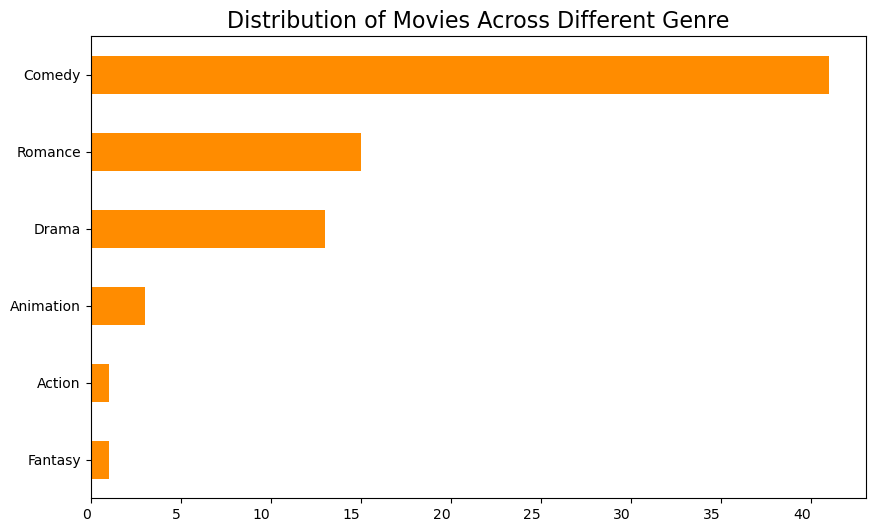

In [214]:
# Plot a pie chart to visualize the distribution
plt.figure(figsize=(10,6))
Distribution_M0vies_Genre.plot(kind='barh',color='darkorange')
plt.title('Distribution of Movies Across Different Genre',fontsize=16)
plt.ylabel('')
plt.xticks(rotation=0,ha='right')
plt.gca().invert_yaxis()
plt.show()

In [217]:
# How Does Profitability Vary by Genre?
# Task: Use groupby to calculate the average profitability for each genre. 
# Visualize the results using a bar chart to compare the profitability across genres.

Profitability_Genre=df.groupby('Genre')['Profitability'].mean().round(2).sort_values(ascending=False)
Profitability_Genre

Genre
Drama        8.41
Romance      4.37
Comedy       3.94
Animation    3.22
Fantasy      1.78
Action       1.25
Name: Profitability, dtype: float64

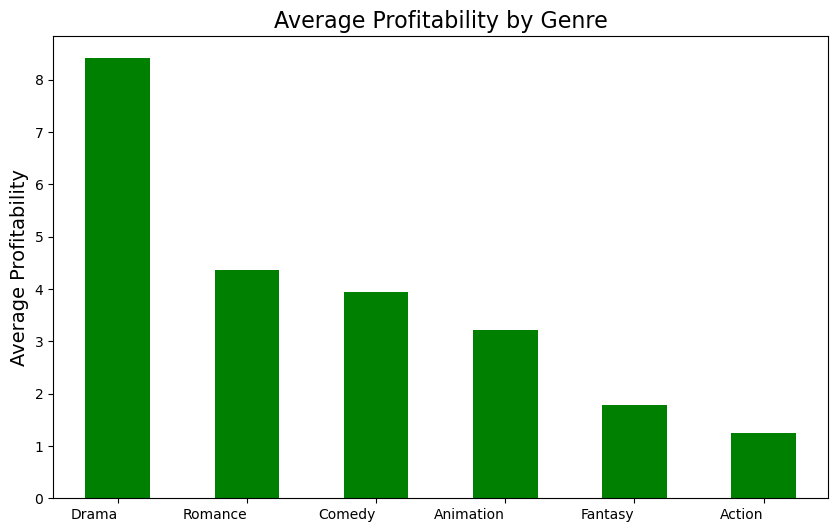

In [218]:
# To visualize the result using a bar chart
plt.figure(figsize=(10,6))
Profitability_Genre.plot(kind='bar',color='green')
plt.title('Average Profitability by Genre',fontsize=16)
plt.xlabel('')
plt.ylabel('Average Profitability',fontsize=14)
plt.xticks(rotation=0,ha='right')
plt.show()

In [219]:
# Which Genre has the Highest Total Worldwide Gross?
WorldwideGross_Genre=df.groupby('Genre')['Worldwide Gross'].mean().round(2).sort_values(ascending=False)
WorldwideGross_Genre

Genre
Animation    356.78
Fantasy      285.43
Romance      133.54
Comedy       130.50
Drama         99.01
Action        93.40
Name: Worldwide Gross, dtype: float64

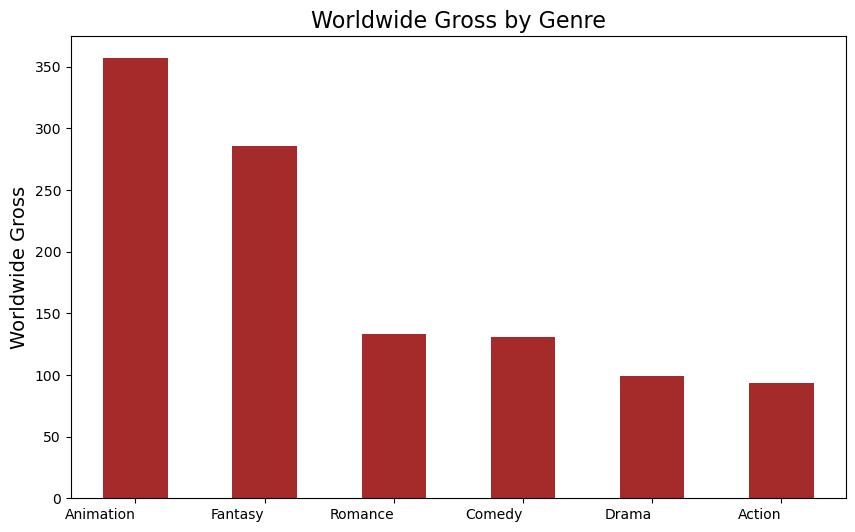

In [221]:
# To visualize the results using a bar chart.
plt.figure(figsize=(10,6))
WorldwideGross_Genre.plot(kind='bar',color='brown')
plt.title('Worldwide Gross by Genre',fontsize=16)
plt.xlabel('')
plt.ylabel('Worldwide Gross',fontsize=14)
plt.xticks(rotation=0,ha='right')
plt.show()

In [223]:
# How Does the Average Audience Score Vary Across Different Genres?
Audiencescore_Genre=df.groupby('Genre')['Audience score %'].mean().round(2).sort_values(ascending=False)
Audiencescore_Genre

Genre
Fantasy      81.00
Animation    76.33
Drama        67.23
Romance      65.60
Comedy       61.39
Action       45.00
Name: Audience score %, dtype: float64

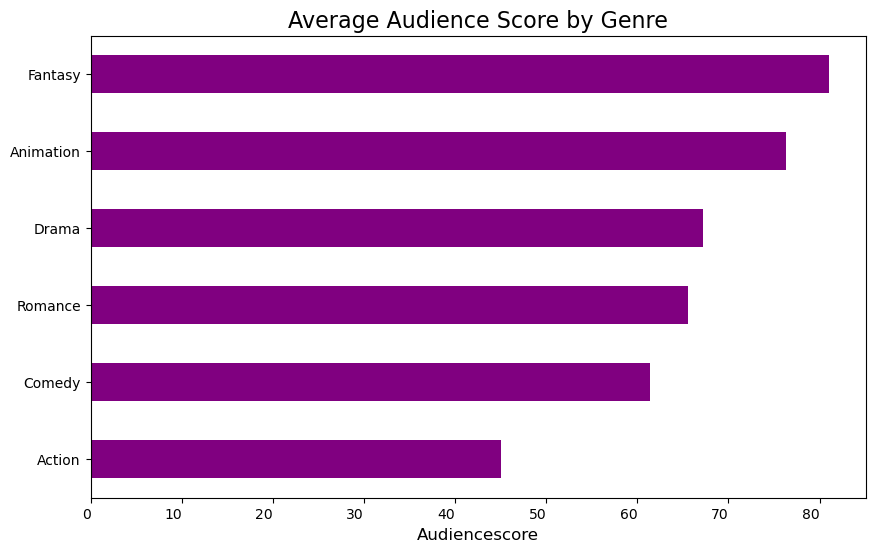

In [227]:
# To Visualize the findings with a horizontal bar char
plt.figure(figsize=(10,6))
Audiencescore_Genre.plot(kind='barh',color='purple')
plt.title('Average Audience Score by Genre',fontsize=16)
plt.ylabel('')
plt.xlabel('Audiencescore',fontsize=12)
plt.xticks(rotation=0,ha='right')
plt.gca().invert_yaxis()
plt.show()